Created on Sep 11 2024

author: Yida Zhang

### What the ABP signal looks like

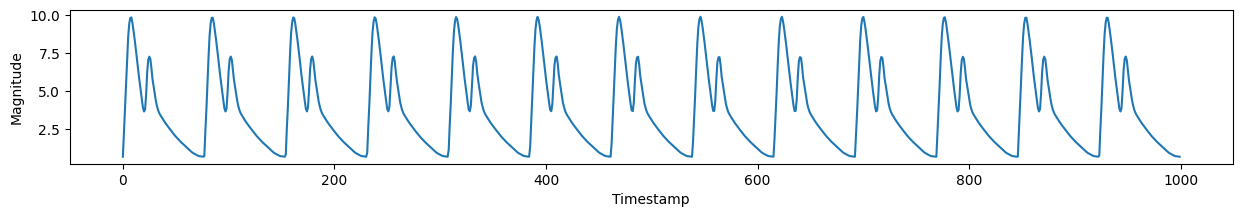

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sig = np.load("./data/ABP_train.npy")[0]
plt.figure(figsize=(15,2))
plt.plot(sig[:1000])
plt.xlabel("Timestamp")
plt.ylabel("Magnitude")
plt.show()

### Test whether the area is equal to SV label

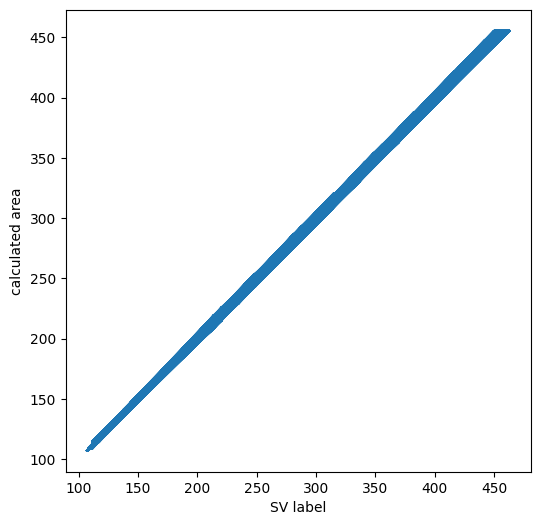

In [2]:
from utils import calculate_area
import numpy as np
import matplotlib.pyplot as plt

data_train = np.load("./data/ABP_train.npy")
data_test = np.load("./data/ABP_test.npy")
data_all = np.vstack((data_train,data_test))
SV = data_all[:,-3]
cal_area = []
for i in range(SV.shape[0]):
    cal_area.append(calculate_area(data_all[i,:1000]))
plt.figure(figsize=(6,6))
plt.plot(SV,cal_area)
plt.ylabel('calculated area')
plt.xlabel('SV label')
plt.show()

### Test whether the equation 'MAP = SV * HR * TPR' is satisfied

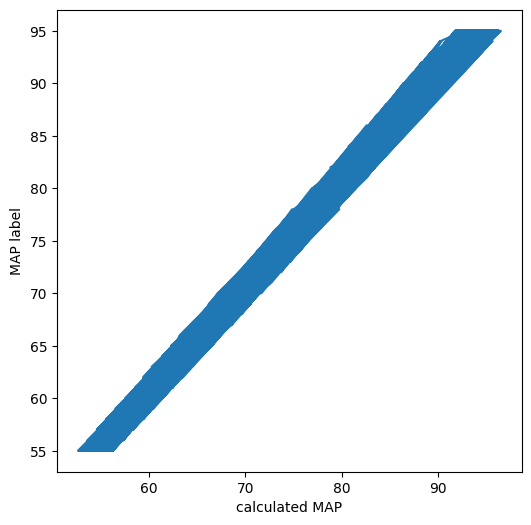

In [3]:
from utils import calculate_area, get_tpr_from_signal
import numpy as np
import matplotlib.pyplot as plt

data_train = np.load("./data/ABP_train.npy")
data_test = np.load("./data/ABP_test.npy")
data_all = np.vstack((data_train, data_test))
MAP = data_all[:,-1]
cal_area = []
cal_tpr = []
for i in range(SV.shape[0]):
    cal_area.append(calculate_area(data_all[i,:1000]))
    cal_tpr.append(get_tpr_from_signal(data_all[i,:1000]))
cal_MAP = np.array(cal_area) * data_all[:,-5] * np.array(cal_tpr) # SV * hr * TPR

plt.figure(figsize=(6,6))
plt.plot(cal_MAP,MAP)
plt.xlabel('calculated MAP')
plt.ylabel('MAP label')
plt.show()

### Comparison of ABP and Waveform
Due to the interpolation, the Waveform may have a slight difference to ABP

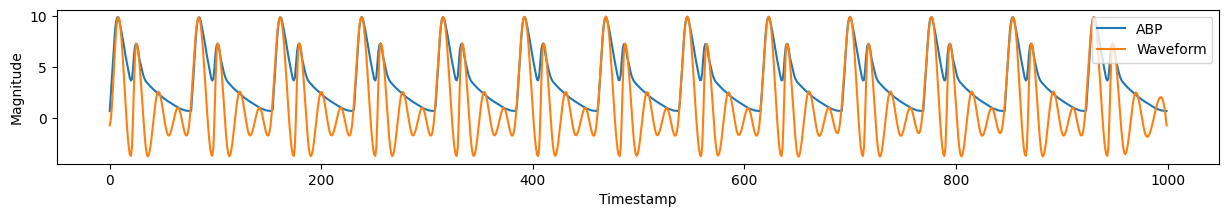

In [4]:
import numpy as np
import matplotlib.pyplot as plt


data_ABP = np.load("./data/ABP_train.npy")
data_BSG = np.load("./data/BSG_train.npy")
signal_ABP = data_ABP[0,:1000]
signal_BSG = data_BSG[0,:1000]

plt.figure(figsize=(15,2))
plt.plot(signal_ABP,label="ABP")
plt.plot(signal_BSG,label="Waveform")
plt.xlabel("Timestamp")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

### Respiration effect

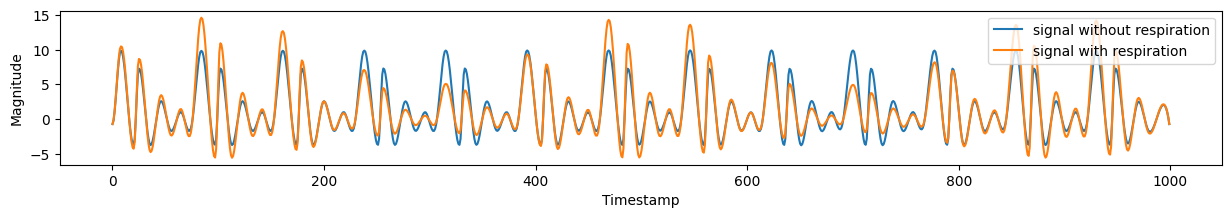

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from utils import add_respiration

data_BSG_train = np.load('./data/BSG_train.npy')
data_BSG_rr_train = np.load('./data/BSG_train_rr.npy')
sig = data_BSG_train[0,:1000]
sig_rr = data_BSG_rr_train[0,:1000]

plt.figure(figsize=(15,2))
plt.plot(sig,label="signal without respiration")
plt.plot(sig_rr,label="signal with respiration")
plt.xlabel("Timestamp")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

### Add noise to the BSG

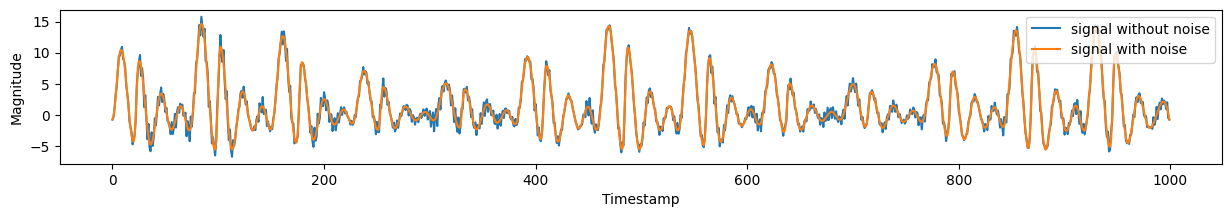

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from utils import white_noise

data_train_rr = np.load("./data/BSG_train_rr.npy")
data_train_rr_noise = np.load('./data/BSG_train_rr_noise.npy')

plt.figure(figsize=(15,2))
plt.plot(data_train_rr_noise[0,:1000],label="signal without noise")
plt.plot(data_train_rr[0,:1000],label="signal with noise")
plt.xlabel("Timestamp")
plt.ylabel("Magnitude")
plt.legend()
plt.show()